In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.optimize import curve_fit
from open_ascci import openAscci as opasc

In [2]:
rome = opasc("nm_rome.dat")
nm_date, nm_rate = rome.readfile2col()
av_date, av_rate = rome.promHourly(nm_date, nm_rate, 6)

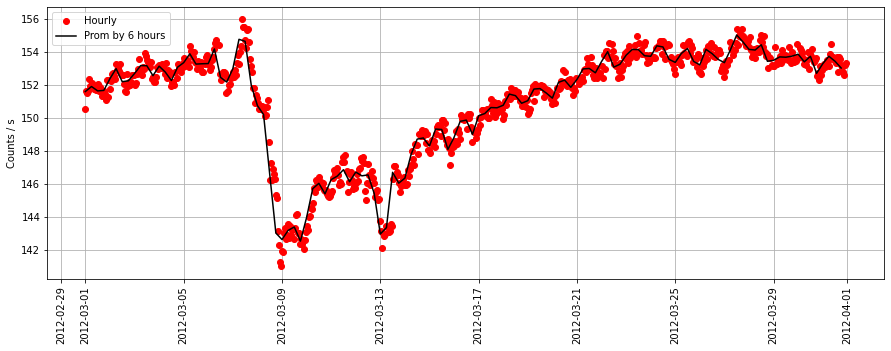

In [3]:
fig=plt.figure(figsize=(15,5))

plt.plot(nm_date, nm_rate, "or", label="Hourly")
plt.plot(av_date, av_rate, "-k", label="Prom by 6 hours")

plt.ylabel("Counts / s")
plt.xticks(rotation=90)

plt.legend()
plt.grid()
plt.show()

### Plotting the recovery phase

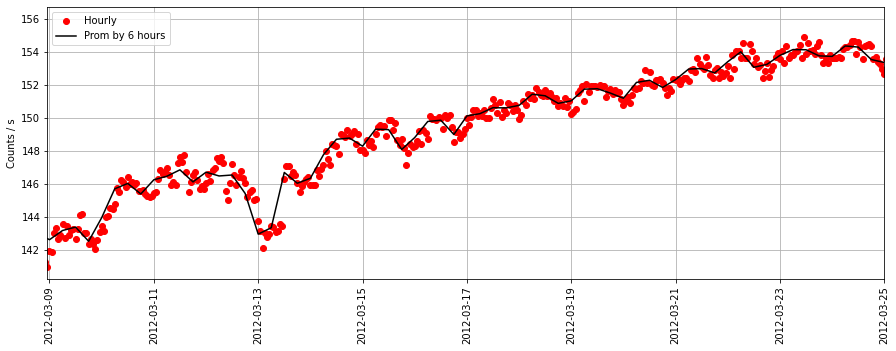

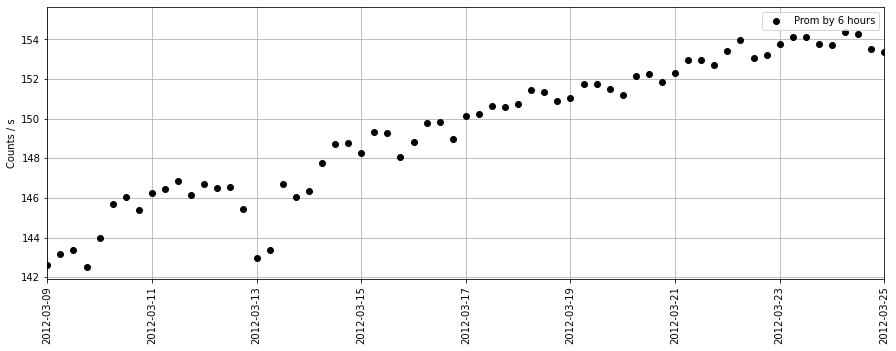

In [4]:
fig=plt.figure(figsize=(15,5))

plt.plot(nm_date, nm_rate, "or", label="Hourly")
plt.plot(av_date, av_rate, "-k", label="Prom by 6 hours")

plt.xlim(nm_date[191], nm_date[576])

plt.ylabel("Counts / s")
plt.xticks(rotation=90)

plt.legend()
plt.grid()
plt.show()


fig=plt.figure(figsize=(15,5))

plt.plot(av_date, av_rate, "ok", label="Prom by 6 hours")

plt.xlim(av_date[32], av_date[96])

plt.ylabel("Counts / s")
plt.xticks(rotation=90)

plt.legend()
plt.grid()
plt.show()

## Fitting the Forbush recovery phase

In [5]:
def expon(x, a1, a2):
    return av_rate[32] + a1*np.exp(x*a2)

def pol2(x, a, b, c):
    return a*x*x + b*x + c

def poto(x, a, n):
    return a*x**n

In [7]:
lims = 97
limi = 32

#xtime = np.array([i for i in range(limi,lims)], float)
xtime = np.array([i for i in range(lims-limi)], float)

parsEx, covEx = curve_fit(expon, xtime, av_rate[limi:lims], p0 = [0., 0.])
parspl2, covpl2 = curve_fit(pol2, xtime, av_rate[limi:lims], p0 = [0., 0., 0])
parsPo, covPo = curve_fit(poto, xtime, av_rate[limi:lims], p0 = [0., 0.2])

lims = 95
limi = 48

#xtime0 = np.array([i for i in range(limi,lims)], float)
xtime0 = np.array([i for i in range(lims-limi)], float)

parspl0, covpl0 = curve_fit(pol2, xtime0, av_rate[limi:lims], p0 = [0., 0., 0])


print(parsEx)
print("")
print(parspl2)
print("")
print(parspl0)
print("")
print(parsPo)

print("")
print("=================================================")
print("")

print(covEx)
print("")
print(covpl2)
print("")
print(covpl0)

print(np.sqrt(np.diag(covEx)))
print("")

[2.96401344 0.02353917]

[-1.01970875e-03  2.42290160e-01  1.43127583e+02]

[-3.45025498e-03  3.46963651e-01  1.45233290e+02]

[1.38883847e+02 2.30866503e-02]


[[ 4.53987540e-02 -2.97603984e-04]
 [-2.97603984e-04  2.16158768e-06]]

[[ 1.35246925e-07 -8.65580379e-06  9.08859806e-05]
 [-8.65580379e-06  5.92029986e-04 -7.03457531e-03]
 [ 9.08859806e-05 -7.03457531e-03  1.13443913e-01]]

[[ 4.39577214e-07 -2.02205517e-05  1.51654121e-04]
 [-2.02205517e-05  9.94763246e-04 -8.46230065e-03]
 [ 1.51654121e-04 -8.46230065e-03  9.83932113e-02]]
[0.21306983 0.00147023]



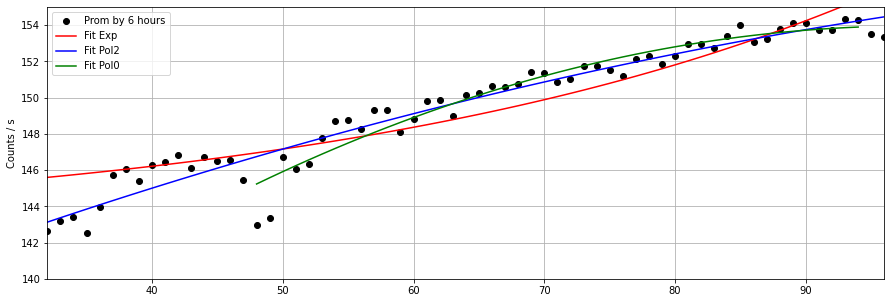

In [9]:
fig=plt.figure(figsize=(15,5))

plt.plot(av_rate, "ok", label="Prom by 6 hours")
plt.plot(xtime+32, expon(xtime, parsEx[0], parsEx[1]), "-r", label="Fit Exp")
plt.plot(xtime+32, pol2(xtime, parspl2[0], parspl2[1], parspl2[2]), "-b", label="Fit Pol2")
plt.plot(xtime0+48, pol2(xtime0, parspl0[0], parspl0[1], parspl0[2]), "-g", label="Fit Pol0")
#plt.plot(xtime+32, poto(xtime, parsPo[0], parsPo[1]), "-v", label="Fit Power")

plt.xlim(32, 96)
plt.ylim(140, 155)

plt.ylabel("Counts / s")

plt.legend()
plt.grid()
plt.show()